# EDA: Netflix Title Plot Popularity Detailed Analysis
study made by: Jorge García Navarro

## 1. Data Mining

In [3]:
import os, sys
import pandas as pd
from utils.mining_data_tb import OmdbCleaner, NetCleaner, WordCleaner

rootpath = os.path.dirname(os.getcwd())

# PATHS
data_path = rootpath + os.sep + 'data'
net_raw_path = data_path + os.sep + 'Netflix_raw'
net_movies_path = net_raw_path + os.sep + 'netflix_movie_titles.csv'
imdb_path = data_path + os.sep + 'titles.tsv'
omdb_net_path = data_path + os.sep + 'OMDb_Netflix'
netid_path = net_raw_path + os.sep + 'Net_Data_ID.csv'

netid_path = data_path + os.sep + 'Netflix_raw' + os.sep + 'Net_Data_ID.csv'

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jgnsa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jgnsa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
#OMDB
omdb = OmdbCleaner(net_path=net_movies_path, imdb_path=imdb_path, omdb_net_path=omdb_net_path)
omdb.get_imdb_ids(save=True)
omdb.omdb_to_csv(netid_path, savepath=omdb_net_path, row_start=10, row_num=10) #Ejemplo de llamada a API
omdb.join_omdb(omdb_net_path, save=True)

#NETFLIX
netflix = NetCleaner()
netflix.get_title_ratings(net_raw_path, data_path, save=True)
netflix.get_base_dataframe(data_path, omdb_net_path, save=True)

#WORD STATS
base = pd.read_csv(data_path + os.sep + 'BASE.csv')
base = base.drop('Unnamed: 0', axis=1)
wcleaner = WordCleaner(base)
wcleaner.expand_df(savepath=data_path, save=True)
wcleaner.get_popdf('Mystery', log=True) #Example method for obtaining word stats of a certain genre.
wordstat_path = data_path + os.sep + 'word_stats'
wcleaner.genres_to_popcsv(wordstat_path) #ATENTION: If there are no previous word_stats files the estimates processing time is ~5 HOURS.

## 2. Visualization

In [13]:
from utils.visualization_tb import Visualizer

#DATASETS
base = pd.read_csv(data_path + os.sep + 'BASE.csv')
expanse = pd.read_csv(data_path + os.sep + 'EXPANSE.csv')
word_stats = pd.read_csv(data_path + os.sep + 'WORD_STATS.csv')

viz = Visualizer(base, expanse, word_stats)

### 2.1 Project Steps Chart

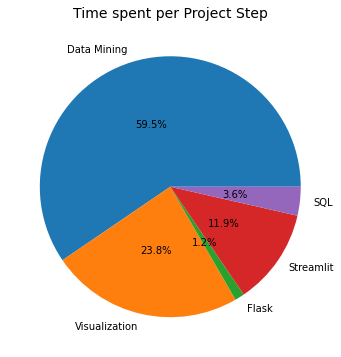

In [6]:
viz.timepie()

### 2.2 Graphs

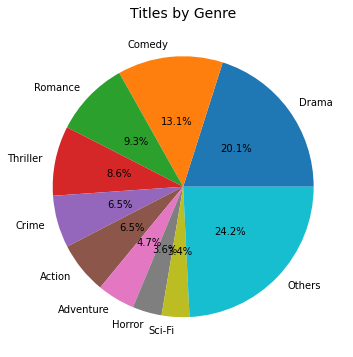

In [8]:
viz.plot_genre_pie()

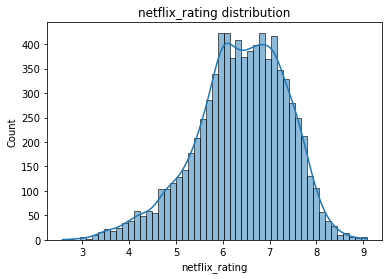

In [6]:
viz.plot_displot()

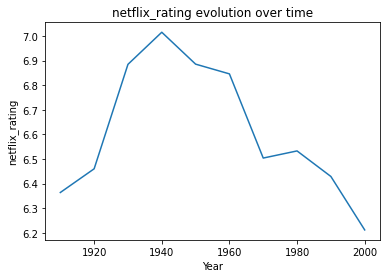

In [7]:
viz.plot_year_lineplot()

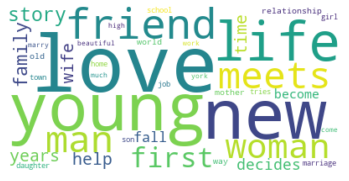

In [9]:
viz.generate_wordcloud('Romance') #Romance WordCloud example.

In [10]:
viz.plot_treemap()

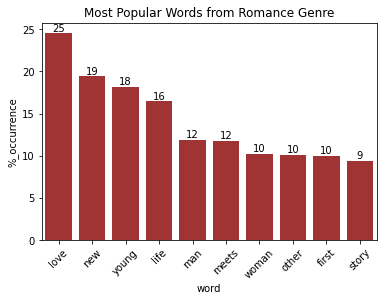

In [12]:
viz.plot_word_barchart('Romance', x='word', y='%_occurrence', sort=1, show_values=True)

## 3. Flask & Streamlit

* Flask server: run /api/server.py -x 8642 on terminal.
* Streamlit: run /dashboard/app.y on terminal

## 4. Option C EDA Questions

### a. Was it possible to demonstrate the hypothesis? Why?
After many data transformations on the Base Dataset, it was possible to find an answer to the stated hypothesis. 
                The analyzed data showed not only that the best rated genre was Film-Noir instead of Drama, 
                but neither 'murder' nor 'vengeance' were in the top 20.
### b. What can you conclude about your data study?
Based on the analyzed data it can be stated that the genre 'Film-Noir' has the highest rating
                and the most common words by %_occurrence are: 'new', 'young', 'life'.
### c. What would you change if you need to do another EDAproject?
The data mining should be more specific. 
                There was not a clear goal at the beggining and valuable time was wasted on this particular task.
                Furthermore, the results would be more reliable if more data was gathered.
### d. What did you learn doing this project?
To specify as much as possible the objective of the project and what is needed to reach that purpose.

## 5. Histograms and Heatmaps

### 5.1 Netflix Rating Histogram

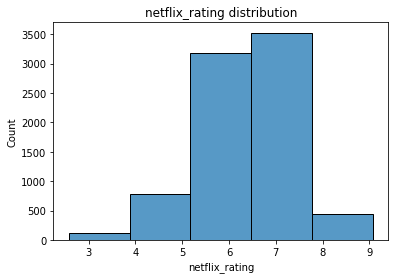

In [8]:
viz.plot_displot(kde=False, bins=5)

### 5.2 IMDB Rating Histogram

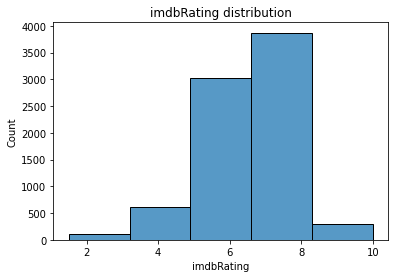

In [9]:
viz.plot_displot(x='imdbRating', kde=False, bins=5)

### 5.3 Metascore Rating Histogram

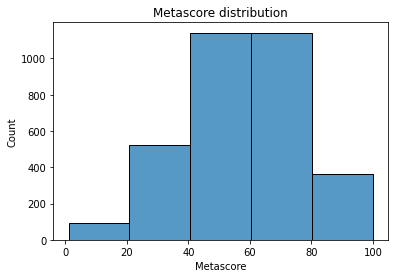

In [10]:
viz.plot_displot(x='Metascore', kde=False, bins=5)

### 5.4 BASE Heatmap

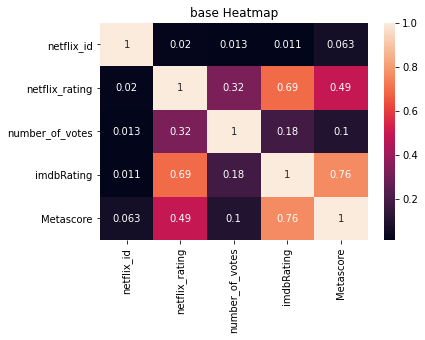

In [14]:
viz.heatmap()

### 5.5 EXPANSE Heatmap

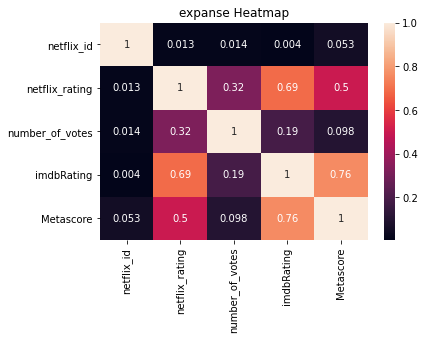

In [16]:
viz.heatmap(data='expanse')

### 5.6 WORD STATS Heatmap

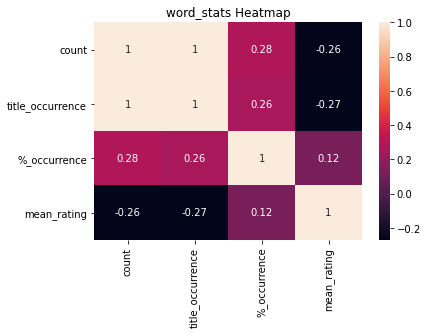

In [17]:
viz.heatmap(data='word_stats')

## 6. SQL Server

In [15]:
from utils.sql_tb import MySQL
from utils.folders_tb import read_json

settings_file = rootpath + os.sep + 'src' + os.sep + 'utils' + os.sep + 'sql_settings.json'
json = read_json(fullpath=settings_file)

IP_DNS = json["IP_DNS"]
PORT = json["PORT"]
USER = json["USER"]
PASSWORD = json["PASSWORD"]
BD_NAME = json["BD_NAME"]

driver = MySQL(IP_DNS, USER, PASSWORD, BD_NAME, PORT)

In [16]:
driver.df_to_table('jorge_garcia_navarro', base)

7.2", "68.0", "Drama", "The Maclean brothers, Paul and Norman, live a relatively idyllic life in rural Montana, spending much of their time fly fishing. The sons of a minister, the boys eventually part company when Norman moves east to attend college, leaving his rebellious brother to find trouble back home. When Norman finally returns, the siblings resume their fishing outings, and assess both where they've been and where they're going.")

 successfully
(1064, 'You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near \'Going Down" offers a glimpse of his personal hell with a wickedly funny twist.")\' at line 1')
Executed 

INSERT INTO jorge_garcia_navarro (NETFLIX_ID, NETFLIX_RATING, NUMBER_OF_VOTES, TITLE, IMDBID, YEAR, IMDBRATING, METASCORE, GENRE, PLOT) VALUES (17711, "6.338342220067863", 2063, "The Diary of Ellen Rimbauer", "tt0350811", 2003, "5.5", "0", "Drama, Horror, Mystery, Thriller", "Set at the tur

## 7. Option A Questions

### a. Are there outliers or some rare data?
Based on the nature of the study on the collected data, the are no outliers to be considered. 

### b. What are the columns that have more repeated values?
Every row on the used Datasets is unique, so the should not be any repeated values. There is an issue pending for future optimization were some similar titles returned the same IMDb ID when merged (eg. The Godfather parts II and III).